In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import torchvision.transforms as T

sys.path.append("..")

plt.rcParams["font.family"] = "DejaVu Sans"

In [2]:
TRAIN_CSV = "../data/processed/train.csv"
IMAGE_ROOT = "../data/raw/images"

df = pd.read_csv(TRAIN_CSV)
df.head()

,image_name,shape_0,shape_1,shape_2,shape_3,shape_4,shape_5,shape_6,shape_7,shape_8,shape_9,shape_10,shape_11,fabric_0,fabric_1,fabric_2,pattern_0,pattern_1,pattern_2
0,WOMEN-Dresses-id_00007527-06_1_front.jpg,0,0,3,0,0,1,1,1,0,5,1,1,5,5,7,3,3,7
1,WOMEN-Blouses_Shirts-id_00003814-05_2_side.jpg,0,4,3,0,0,0,0,1,3,6,2,1,5,0,7,3,3,7
2,MEN-Tees_Tanks-id_00006820-06_4_full.jpg,0,4,3,2,4,0,0,0,3,2,1,1,1,1,7,1,3,7
3,WOMEN-Tees_Tanks-id_00005808-04_2_side.jpg,1,4,3,0,0,1,1,1,3,0,1,1,1,0,7,3,3,7
4,WOMEN-Tees_Tanks-id_00002271-06_2_side.jpg,1,4,3,0,0,2,0,0,3,6,2,2,1,1,7,2,3,7


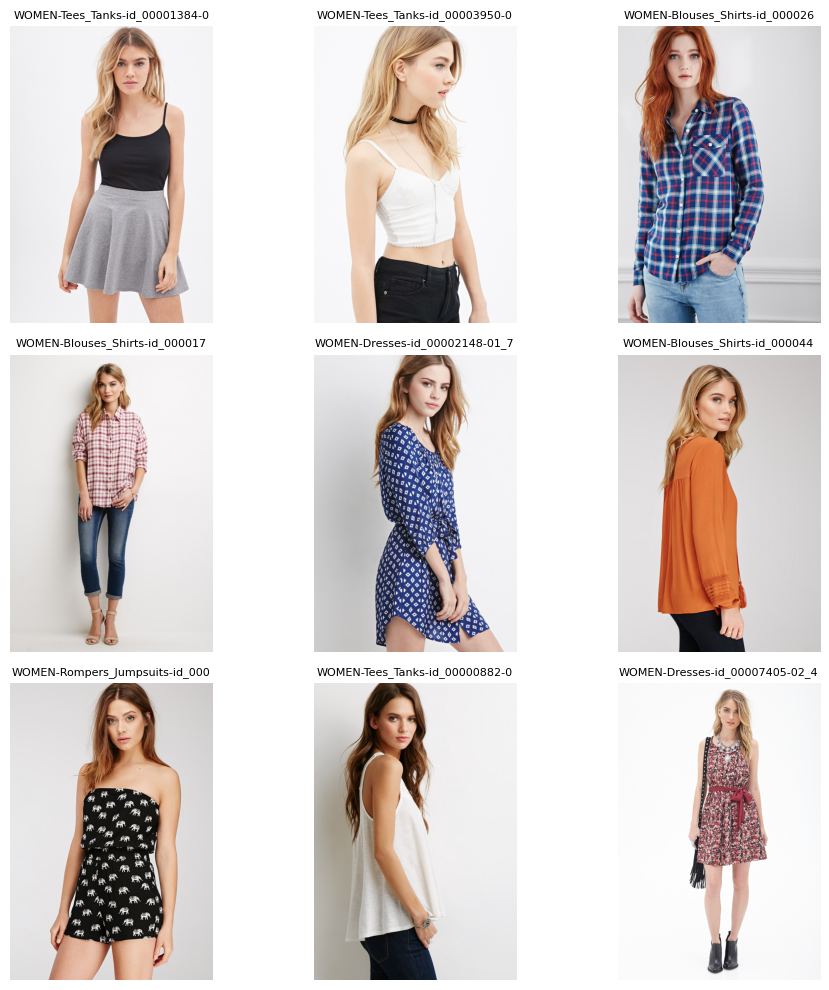

In [4]:
# 1. 데이터 샘플
def show_samples(df, num=9):
    sample_df = df.sample(num).reset_index(drop=True)
    plt.figure(figsize=(10, 10))

    for i in range(num):
        img_path = os.path.join(IMAGE_ROOT, sample_df.loc[i, "image_name"])
        img = Image.open(img_path)

        plt.subplot(3, 3, i+1)
        plt.imshow(img)
        plt.title(sample_df.loc[i, "image_name"][:30], fontsize=8)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

show_samples(df, num=9)

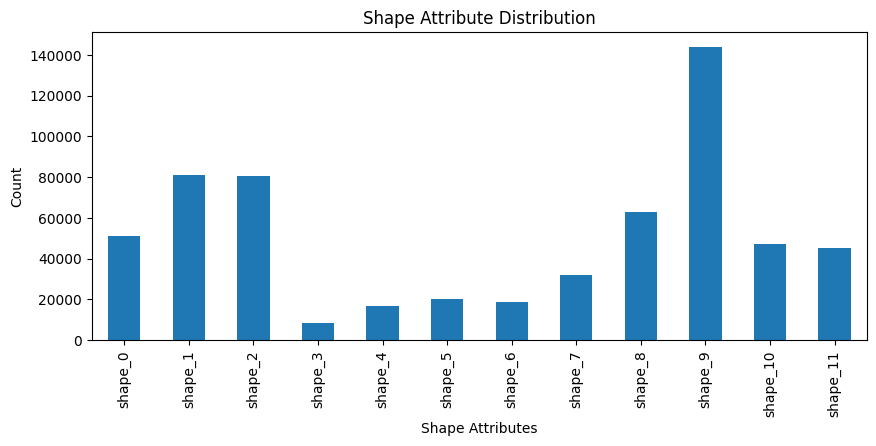

In [5]:
# 2. 라벨 분포
# shape
shape_cols = [c for c in df.columns if "shape_" in c]

df[shape_cols].sum().plot(kind="bar", figsize=(10, 4))
plt.title("Shape Attribute Distribution")
plt.xlabel("Shape Attributes")
plt.ylabel("Count")
plt.show()

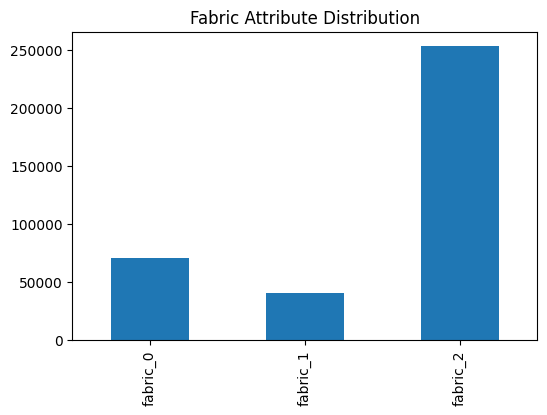

In [6]:
# fabric
fabric_cols = [c for c in df.columns if "fabric_" in c]

df[fabric_cols].sum().plot(kind="bar", figsize=(6, 4))
plt.title("Fabric Attribute Distribution")
plt.show()

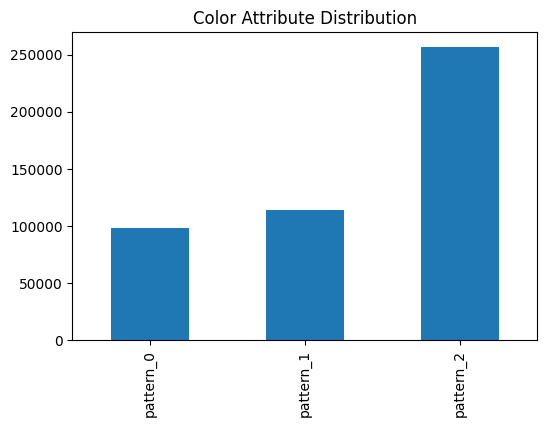

In [ ]:
# Color
pattern_cols = [c for c in df.columns if "pattern_" in c]

df[pattern_cols].sum().plot(kind="bar", figsize=(6, 4))
plt.title("Color Attribute Distribution")
plt.show()

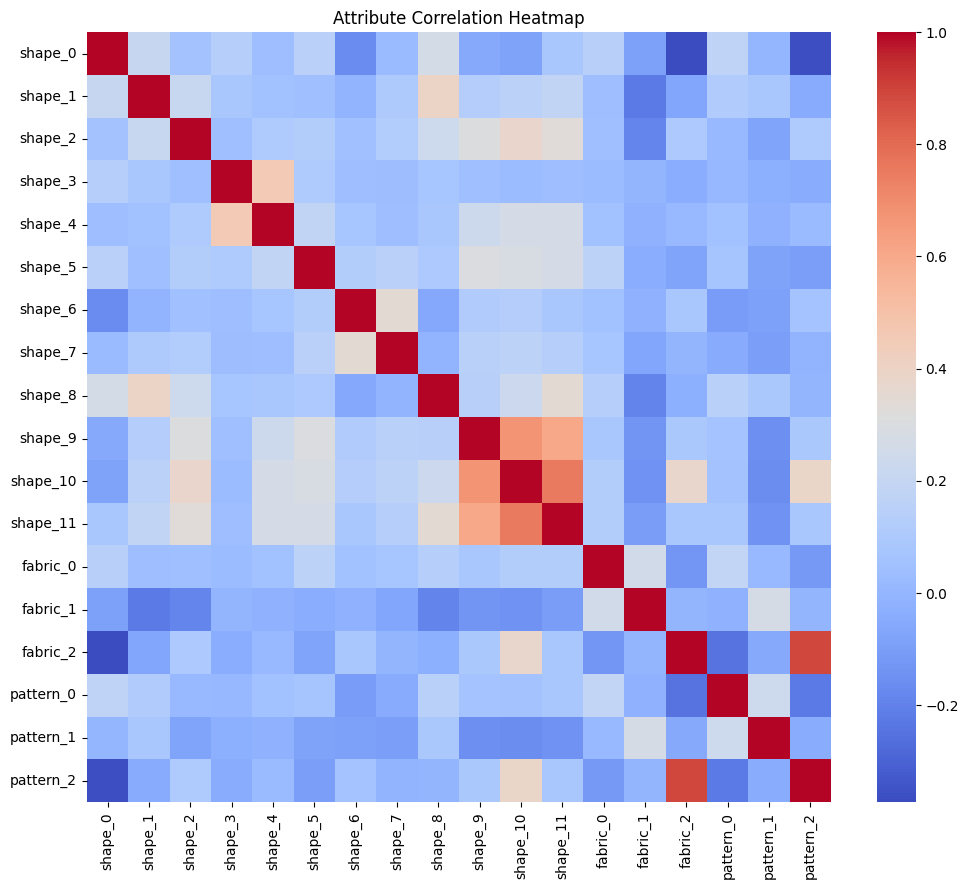

In [8]:
# 3. Attribute Correlation Heatmap
attr_cols = shape_cols + fabric_cols + pattern_cols

plt.figure(figsize=(12, 10))
sns.heatmap(df[attr_cols].corr(), cmap="coolwarm", annot=False)
plt.title("Attribute Correlation Heatmap")
plt.show()

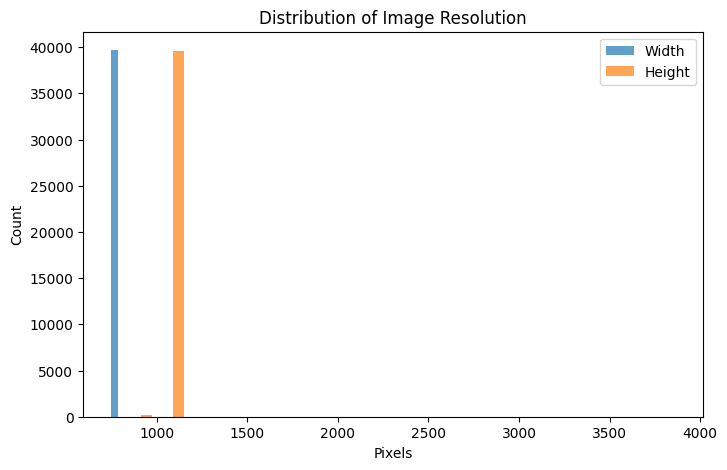

In [9]:
# 4. 이미지 특성
# 해상도
def get_image_size(path):
    try:
        img = Image.open(path)
        return img.size  # (width, height)
    except:
        return None

df["img_path"] = df["image_name"].apply(lambda x: os.path.join(IMAGE_ROOT, x))
df["size"] = df["img_path"].apply(get_image_size)

df["width"]  = df["size"].apply(lambda x: x[0] if x else None)
df["height"] = df["size"].apply(lambda x: x[1] if x else None)

plt.figure(figsize=(8,5))
plt.hist(df["width"].dropna(), bins=50, alpha=0.7, label="Width")
plt.hist(df["height"].dropna(), bins=50, alpha=0.7, label="Height")
plt.legend()
plt.title("Distribution of Image Resolution")
plt.xlabel("Pixels")
plt.ylabel("Count")
plt.show()

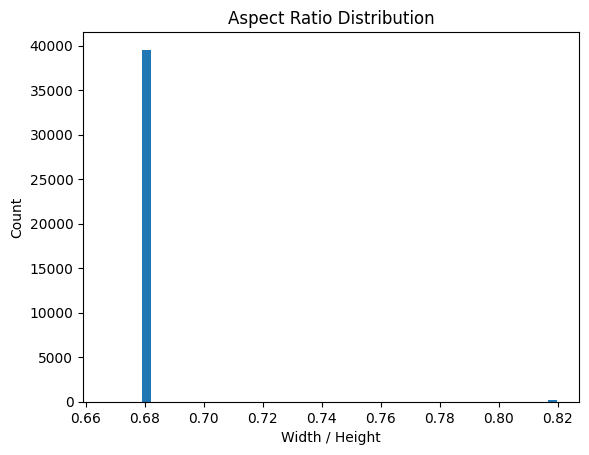

In [10]:
# Aspect Ratio
df["aspect_ratio"] = df["width"] / df["height"]

plt.hist(df["aspect_ratio"].dropna(), bins=50)
plt.title("Aspect Ratio Distribution")
plt.xlabel("Width / Height")
plt.ylabel("Count")
plt.show()

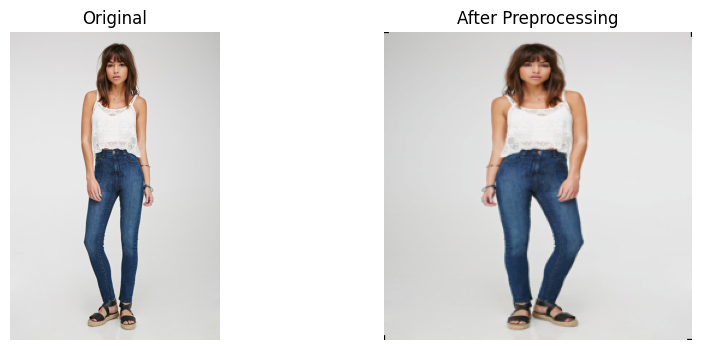

In [ ]:
# 전처리 전/후 비교
preprocess = T.Compose([
    T.Resize((256, 256)),
    T.RandomHorizontalFlip(),
    T.RandomRotation(5),
    T.ToTensor(),
    T.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

def show_preprocessing_example(df):
    img_name = df.sample(1)["image_name"].iloc[0]
    img_path = os.path.join(IMAGE_ROOT, img_name)

    img = Image.open(img_path).convert("RGB")
    processed = preprocess(img).permute(1,2,0).numpy()

    plt.figure(figsize=(10,4))

    # 원본
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis("off")

    # 전처리 후
    plt.subplot(1,2,2)
    plt.imshow((processed * np.array([0.229,0.224,0.225]) + np.array([0.485,0.456,0.406])).clip(0,1))
    plt.title("After Preprocessing")
    plt.axis("off")

    plt.show()

show_preprocessing_example(df)